In [69]:
import re
from datetime import datetime

import matplotlib.pyplot as plt
def get_fps(recv_log_file):
    fps_values=[]
    fps_pattern=re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - fps:(?P<fps>\d+)')
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            fps_match = fps_pattern.search(line)
            if fps_match:
                timestamp_str = fps_match.group('timestamp')
                fps = fps_match.group('fps')
                # print(frame_delay_str)
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                fps_values.append({
                    'timestamp': timestamp,
                    'fps': int(fps),
                })
    return fps_values
def plot_jit_delay(recv_log_file):
    jit_dur_values = []
    # 2024-01-11 17:31:31 - DEBUG - RTCRtpReceiver(decoder_worker) [DECODE] stream_id: 1, is_key_frame: 0, T: 1509007, dec_dur: 1, wait_time: 0, jitter_delay_ms: 302, render_time_ms: 3913954291284, frame_delay_ms: 13378, receive_time_ms: 3913954284564, Bytes: 1564(\d+\.\d+)
    jit_line_pattern=re.compile(r'^(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(decoder_worker\) \[DECODE\] stream_id: \d+, is_key_frame: \d+, T: \d+, dec_dur: \d+, wait_time: (?P<wait_time>\d+), jitter_delay_ms: (?P<jitter_delay>-?\d+), frame_delay_ms: (?P<frame_delay>-?\d+),.*$')
    # jit_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(decoder_worker\) \[DECODE\] stream_id: \d+, is_key_frame: \d+, T: \d+, dec_dur: \d+, wait_time: (?P<wait_time>\d+), jitter_delay_ms: (?P<jitter_delay>\d+), render_time_ms: \d+, frame_delay_ms: \d+, receive_time_ms: \d+, Bytes: \d+')
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            jit_match = jit_line_pattern.search(line)
            if jit_match:
                timestamp_str = jit_match.group('timestamp')
                jit_dur_str = jit_match.group('jitter_delay')
                wait_time_str=jit_match.group('wait_time')
                frame_delay_str=jit_match.group('frame_delay')
                # print(frame_delay_str)
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                jit_dur_values.append({
                    'timestamp': timestamp,
                    'jitter_delay': int(jit_dur_str),
                    'wait_time': int(wait_time_str),
                    "frame_delay":int(frame_delay_str)
                })
    return jit_dur_values
def plot_enc_delay(send_log_file):
    # 2023-12-29 11:40:58 - DEBUG - RTCRtpSender(video) [FRAME_INFO] Stream id : 1, Number: 889, PTS: 444953605, enc_dur: 15 Type: FRAME_P, size: 4510
    enc_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[FRAME_INFO\] Stream id : (?P<streamid>\d+), Number: (?P<time>\d+), PTS: \d+, enc_dur: (?P<enc_dur>\d+) Type: (?P<frametype>\w+), size: (?P<framesize>\d+), queue_time: (?P<expectqueuetime>\d+) ms')
    enc_dur_values = []
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            enc_match= enc_line_pattern.search(line)
            if enc_match:
                    number = enc_match.group('time')
                    enc_dur_str = enc_match.group('enc_dur')
                    streamid = enc_match.group('streamid')
                    frametype = enc_match.group('frametype')
                    framesize = enc_match.group('framesize')
                    expectqueuetime=enc_match.group('expectqueuetime')
                    # 解析时间戳字符串为 datetime 对象
                    # 将时间戳和 jit_dur 添加到列表
                    enc_dur_values.append({
                        'timestamp': int(number),
                        'enc_dur': int(enc_dur_str),
                        "streamid":int(streamid),
                        "frametype":frametype,
                        "framesize":int(framesize),
                        "expectqueuetime":int(expectqueuetime)
                        
                    })
    return enc_dur_values
def plot_dec_delay(recv_log_file):
    # 2024-01-15 15:30:19 - DEBUG - RTCRtpReceiver(decoder_worker) [DECODE] stream_id: 1, is_key_frame: 1, T: 0, dec_dur: 3, wait_time: 0, jitter_delay_ms: 1, frame_delay_ms: 0, render_time_ms: 3914292619118, frame_delay_ms: 0, receive_time_ms: 3914292619072, Bytes: 1574

    dec_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(decoder_worker\) \[DECODE\] stream_id: \d+, is_key_frame: \d+, T: \d+, dec_dur: (?P<dec_dur>\d+), wait_time: \d+, jitter_delay_ms: \d+,.*$')
    dec_dur_values = []
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            dec_match= dec_line_pattern.search(line)
            if dec_match:
                    timestamp_str = dec_match.group('timestamp')
                    dec_dur_str = dec_match.group('dec_dur')
                    # 解析时间戳字符串为 datetime 对象
                    timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                    # 将时间戳和 jit_dur 添加到列表
                    dec_dur_values.append({
                        'timestamp': timestamp,
                        'dec_dur': int(dec_dur_str),
                    })
    return dec_dur_values
def plot_trans_delay(recv_log_file):
    trans_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\]  transport dur: (?P<trans_dur>\d+)')
    trans_dur_values = []
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            trans_match= trans_line_pattern.search(line)
            if trans_match:
                trans_dur_str = trans_match.group('trans_dur')
                # print(trans_dur_str)
                trans_dur_values.append({"trans_dur":int(trans_dur_str)})
def plot_rtt(send_log_file):
    rtt_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[FRAME_INFO\] RTT: (?P<rtt>\d+)')
    rtt_dur_values = []
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            rtt_match= rtt_line_pattern.search(line)
            if rtt_match:
                time_dur_str=rtt_match.group("timestamp")
                rtt_dur_str=rtt_match.group("rtt")
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                rtt_dur_values.append({
                    "timestamp":timestamp,
                    "rtt":float(rtt_dur_str)
                })
    return rtt_dur_values

def plot_send_rate(send_log_file):
    # send_rate_line_pattern = re.compile(r'send_rate: (\d+\.\d+) bps')
    # 2024-01-15 15:30:19 - DEBUG - RTCRtpSender(video) [Send_INFO] timestamp: 3914292619979, send_rate: 299377.601586 bps, packet_count: 46,target_bitrate: 1000000 bps
    # send_rate_line_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[Send_INFO\] timestamp: (\d+), send_rate: (?P<send_rate>\d+\.\d+) bps, packet_count: (\d+),target_bitrate: (?P<target_bitrate>\d+\.\d+) bps')
    send_rate_line_pattern=re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) \[Send_INFO\] timestamp: (\d+), send_rate: (?P<send_rate>[\d\.]+) bps, packet_count: \d+,target_bitrate: (?P<target_bitrate>[\d]+) bps')
    send_rate_values=[]
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            send_match= send_rate_line_pattern.search(line)
            if send_match:
                time_dur_str=send_match.group("timestamp")
                send_dur_str=send_match.group("send_rate")
                target_bitrate=send_match.group("target_bitrate")
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                send_rate_values.append({
                    "timestamp":timestamp,
                    "send_rate":float(send_dur_str),
                    "target_bitrate":float(target_bitrate)
                })
                # print(send_dur_str)
    return send_rate_values
def plot_recv_rate(recv_log_file):

    recv_rate_line_pattern = pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[Recv_INFO\] ssrc: \d+, timestamp: \d+,recv rate: (\d+\.\d+) bps, count_received: \d+')
    recv_rate_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            send_match= recv_rate_line_pattern.search(line)
            if send_match:
                time_dur_str=send_match.group(1)
                recv_dur_str=send_match.group(2)
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(recv_dur_str)
                recv_rate_values.append({
                    "timestamp":timestamp,
                    "recv_rate":float(recv_dur_str)
                })
    return recv_rate_values
# 获取实际编码比特率
def encode_bitrate(send_log_file):
    # bitrate_pattern = re.compile(r'Target_bitrate: (\d+)')
    # bitrate_pattern = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Encodec \| Target bitrate: (?P<bitrate>\d+)')
    bitrate_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Encodec \| Actual target_bitrate: (\d+)')
    bitrate_values=[]
    with open(send_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                time_dur_str=bitrate_match.group(1)
                bitrate_value=bitrate_match.group(2)
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(recv_dur_str)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "encodec_rate":float(bitrate_value)
                })
    return bitrate_values
def trans_packet_dur(recv_log_file):

    bitrate_pattern  = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\] T: (\d+) ,  frame packet dur: (\d+) ms')

    # bitrate_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpReceiver\(video\) \[FRAME_INFO\]  frame packet dur: (\d+\.\d+) ms')
    bitrate_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                time_dur_str=bitrate_match.group(1)
                bitrate_value=bitrate_match.group(3)
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(bitrate_value)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "value":float(bitrate_value)
                })
    return bitrate_values
def get_fisrt_queue_time(log_file):# 每帧数据第一个数据包的pacer时间
    # 2024-01-15 15:30:18 - INFO - Pacer Queue | Pop Packet enqueue_time: 2024-01-15 07:30:18.970886+00:00, outqueue_time: 2024-01-15 07:30:18.971370+00:00, pacer_time: 0.484 ms, priority: 3, packet_type: kVideo,queue_packet: 2,queue_datasizeL 2004
    bitrate_pattern=re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}).*pacer_time: (?P<pacer_time>[\d\.]+) ms.*')
    bitrate_values=[]
    with open(log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            if bitrate_match:
                pacer_time=bitrate_match.group("pacer_time")
                time_dur_str=bitrate_match.group("timestamp")
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(bitrate_value)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "pacer_time":float(pacer_time)
                })
    return bitrate_values
def get_pacer_rate(log_file):
    # 2024-01-05 10:14:33 - DEBUG - RTCRtpSender(video) BWE | receiver estimated maximum bitrate Target bitrate:658456 bps,encode bitrate:658456,pacing bitrate:643
    # bitrate_pattern  = re.compile(r"pacing bitrate:(\d+)")
    bitrate_pattern  = re.compile(r'(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - DEBUG - RTCRtpSender\(video\) BWE \| receiver estimated maximum bitrate Target bitrate:(?P<target_bitrate>\d+) bps,encode bitrate:(?P<encode_bitrate>\d+),pacing bitrate:(?P<pacing_bitrate>\d+)')
    remain_bytes_pattern1  = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Pacer Queue \| IncreaseBudget Update Media_budget: target_rate_kbps:(\d+\.\d+), bytes_remaining:(-?\d+\.\d+)')
    remain_bytes_pattern2  = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - INFO - Pacer Queue \| UseBudget Update Media_budget: target_rate_kbps:(\d+\.\d+), bytes_remaining:(-?\d+\.\d+)')

    bitrate_values=[]
    remain_values=[]
    with open(log_file, 'r') as file:
        for line in file:
            line = line.strip()
            bitrate_match= bitrate_pattern.search(line)
            remain_bytes_match1=remain_bytes_pattern1.search(line)
            remain_bytes_match2=remain_bytes_pattern2.search(line)
            if bitrate_match:
                pacing_bitrate=bitrate_match.group("pacing_bitrate")
                encode_bitrate=bitrate_match.group("encode_bitrate")
                target_bitrate=bitrate_match.group("target_bitrate")
                time_dur_str=bitrate_match.group("timestamp")
                
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(float(value)*1024)
                bitrate_values.append({
                    "timestamp":timestamp,
                    "pacingrate":float(pacing_bitrate)*1024, # bps 
                    "encode_bitrate":float(encode_bitrate),
                    "target_bitrate":float(target_bitrate)
                })
            if remain_bytes_match1:
                remain_bytes=remain_bytes_match1.group(3)
                # bitrate_value=bitrate_match.group(3)
                time_dur_str=remain_bytes_match1.group(1)
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(remain_bytes)
                remain_values.append({
                    "timestamp":timestamp,
                    "remain_bytes":float(remain_bytes) # Bps 
                })
            if remain_bytes_match2:
                remain_bytes=remain_bytes_match2.group(3)
                # bitrate_value=bitrate_match.group(3)
                time_dur_str=remain_bytes_match2.group(1)
                timestamp = datetime.datetime.strptime(time_dur_str, '%Y-%m-%d %H:%M:%S')
                # print(remain_bytes)
                remain_values.append({
                    "timestamp":timestamp,
                    "remain_bytes":float(remain_bytes) # Bps 
                })
    return bitrate_values,remain_values
def calculatr_trans_dur(timestamp1,value1,timestamp2,value2):
    trans_dur=[]
    for t2, v2 in zip(timestamp2, value2):
        # 找到在 t2 之前且时间最近的 timestamp1
        filtered_timestamps = list(filter(lambda t1: t1 <= t2, timestamp1))
        if len(filtered_timestamps)>0:
            closest_timestamp1 = max(filtered_timestamps)
            # 获取对应的 value1
            index = timestamp1.index(closest_timestamp1)
            closest_value1 = value1[index]
            
            # 将结果存储到 result 列表中
            trans_dur.append((float(closest_value1)/2.0+v2))
    return trans_dur


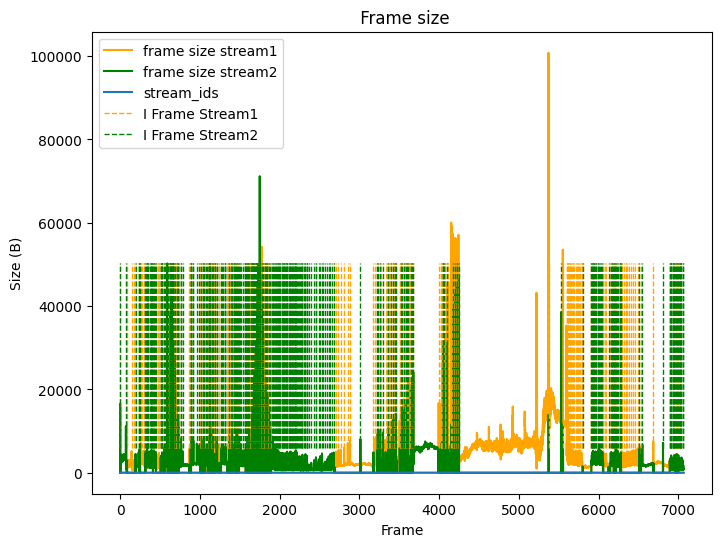

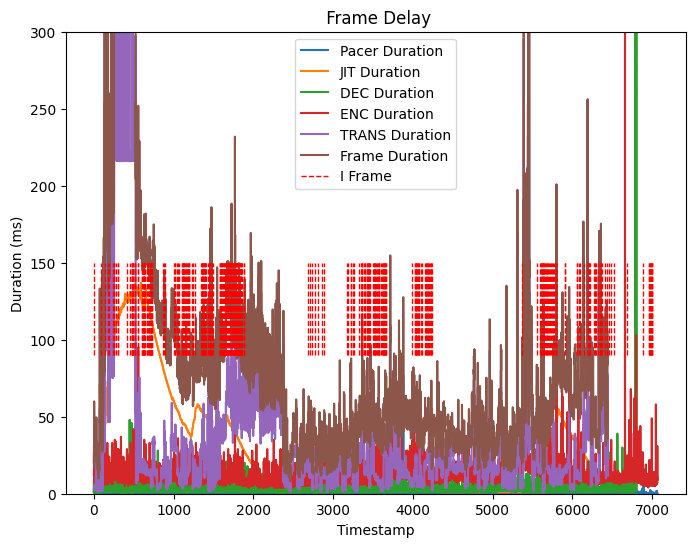

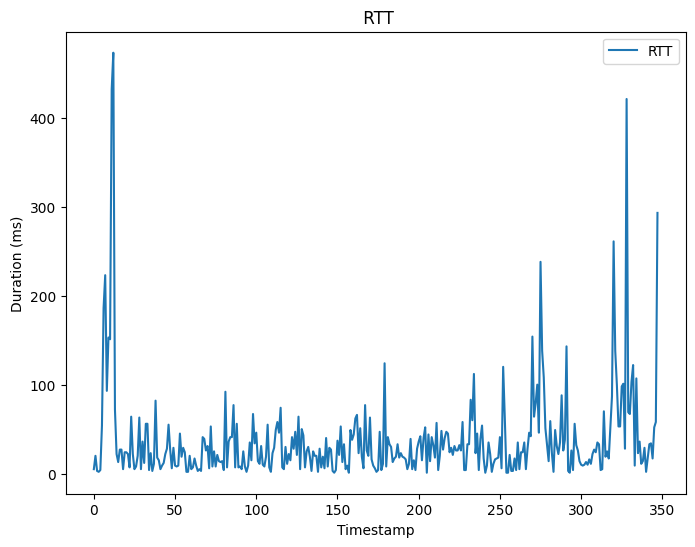

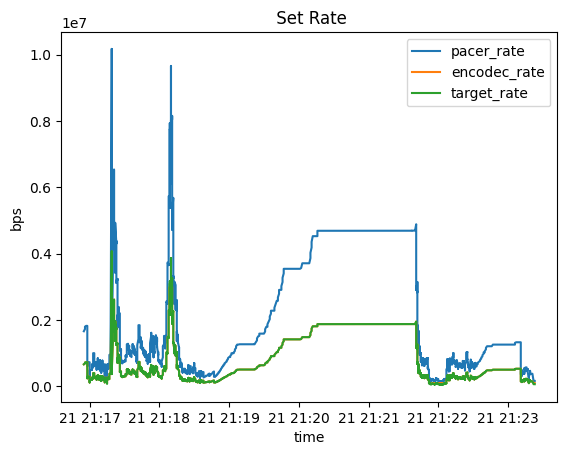

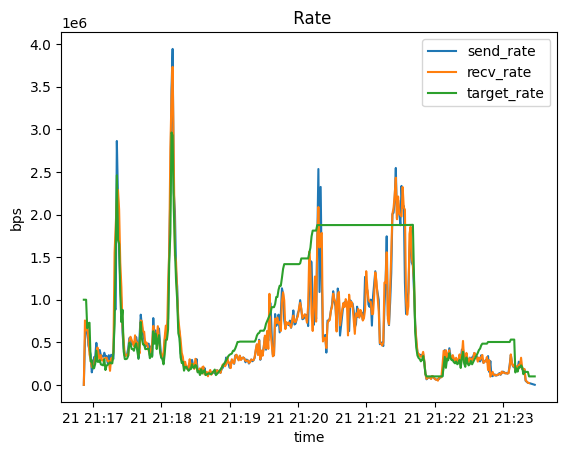

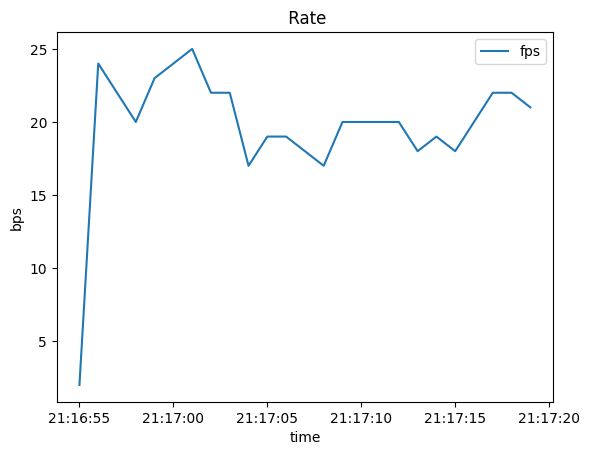

In [63]:
"""log 38:
pacer rate= target rate*1.5
self._drain_large_queues:bool=False # 排空
self.use_multistream =True
未采用I帧接收完成反馈
I帧间隔：50
"""
import re
import datetime
import matplotlib.pyplot as plt
def get_pattern_data(recv_log_file,pattern):
    fps_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            fps_match = pattern.search(line)
            if fps_match:
                timestamp_str = fps_match.group('timestamp')
                data = fps_match.group('data')
                # print(frame_delay_str)
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                fps_values.append({
                    'timestamp': timestamp,
                    'data': float(data),
                })
    return fps_values
send_file="./offer/test-rtt38.log"
recv_file="./answer/test-rtt38.log"
# 提取数据
jit_dur_values=plot_jit_delay(recv_file)
dec_dur_values=plot_dec_delay(recv_file)
enc_dur_values=plot_enc_delay(send_file)
rtt_dur_values=plot_rtt(send_file)
recv_rate_values=plot_recv_rate(recv_file)
send_rate_values=plot_send_rate(send_file)
actual_encodec_values=encode_bitrate(send_file)
trans_dur_values=trans_packet_dur(recv_file)
pacer_values=get_fisrt_queue_time(send_file)
pacer_rate_values,remain_values=get_pacer_rate(send_file) #bps
# 提取时间戳和 jitter_delay估计值 wait_time frame_delay观测值
timestamps1 = [entry['timestamp'] for entry in jit_dur_values]
jit_durs = [entry['jitter_delay'] for entry in jit_dur_values]
wait_times = [entry['wait_time'] for entry in jit_dur_values]
frame_delays = [entry['frame_delay'] for entry in jit_dur_values]
# 提取时间戳和解码延迟
timestamps2 = [entry['timestamp'] for entry in dec_dur_values]
dec_durs = [entry['dec_dur'] for entry in dec_dur_values]
# 提取pacer_time第一个数据包的pacer延迟
timestamps3 = [entry['timestamp'] for entry in pacer_values]
pacer_times = [entry['pacer_time'] for entry in pacer_values]
# 提取设置的pacing rate target_bitrate encode_bitrate
timestamps4 = [entry['timestamp'] for entry in pacer_rate_values]
pacer_rates_set = [entry['pacingrate'] for entry in pacer_rate_values]
target_rate_set = [entry['target_bitrate'] for entry in pacer_rate_values]
encode_rate_set = [entry['encode_bitrate'] for entry in pacer_rate_values]

# 提取remain_bytes
timestamp5 = [entry['timestamp'] for entry in remain_values]
remain_bytes = [entry['remain_bytes'] for entry in remain_values]
# 提取时间戳，enc_dur streamid frametype framesize expectqueuetime
frame_numbers = [float(entry['timestamp'])for entry in enc_dur_values]
enc_durs = [entry['enc_dur'] for entry in enc_dur_values]
stream_ids = [entry['streamid'] for entry in enc_dur_values]
frame_types = [entry['frametype'] for entry in enc_dur_values]
frame_sizes = [float(entry['framesize']) for entry in enc_dur_values]
frame_types_stream1=[]
frame_sizes_stream1=[]
frame_types_stream2=[]
frame_sizes_stream2=[]
expect_queue_time = [entry['expectqueuetime'] for entry in enc_dur_values]

for i in range(len(stream_ids)):
    if stream_ids[i]==1:
        frame_types_stream1.append(frame_types[i])
        frame_sizes_stream1.append(frame_sizes[i])
        frame_types_stream2.append(0)
        frame_sizes_stream2.append(0)
    else:
        frame_types_stream2.append(frame_types[i])
        frame_sizes_stream2.append(frame_sizes[i])
        frame_types_stream1.append(0)
        frame_sizes_stream1.append(0)
# 提取 rtt
timestamps6 = [entry['timestamp'] for entry in rtt_dur_values]
rtt_durs=[enrty["rtt"] for enrty in rtt_dur_values]
# 提取 send_rate target_bitrate
timestamps7 = [entry['timestamp'] for entry in send_rate_values]
send_rate=[entry["send_rate"] for entry in send_rate_values]
target_bitrate=[entry["target_bitrate"] for entry in send_rate_values]

# 提取 recv_rate
timestamps8 = [entry['timestamp'] for entry in recv_rate_values]
recv_rate=[entry["recv_rate"] for entry in recv_rate_values]

# 提取 实际编码encodec_rate
timestamps10 = [entry['timestamp'] for entry in actual_encodec_values]
actual_encodec_rate=[entry["encodec_rate"] for entry in actual_encodec_values]
# 提取 trans_dur
timestamps11 = [entry['timestamp'] for entry in trans_dur_values]
trans_dur=[entry["value"] for entry in trans_dur_values]
trans_dur=calculatr_trans_dur(timestamps6,rtt_durs,timestamps11,trans_dur)

#提取I帧索引
i_frame_indices_stream1 = [i for i, frame_type in enumerate(frame_types_stream1) if frame_type == "SPS" or frame_type=="FRAME_I"]
i_frame_indices_stream2 = [i for i, frame_type in enumerate(frame_types_stream2) if frame_type == "SPS" or frame_type=="FRAME_I"]
# 提取应用层指标fps
fps_values=get_fps(recv_file)
timestamps12 = [entry['timestamp'] for entry in fps_values]
fps=[entry["fps"] for entry in fps_values]



plt.figure(figsize=(8, 6))
plt.plot(frame_sizes_stream1, color='orange',label='frame size stream1')
plt.plot(frame_sizes_stream2, color='green',label='frame size stream2')
plt.plot(stream_ids, label='stream_ids')
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='orange', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream1' if i_frame_index == i_frame_indices_stream1[0] else '')
for i_frame_index in i_frame_indices_stream2:
    plt.axvline(x=i_frame_index, color='green', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream2' if i_frame_index == i_frame_indices_stream2[0] else '')
plt.xlabel('Frame')
plt.ylabel('Size (B)')
plt.title(' Frame size')
# plt.ylim(0,100000)
# plt.xlim(400,500)
# plt.xlim(4000,5000)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(pacer_times,label="Pacer Duration")
plt.plot(jit_durs, label='JIT Duration')
plt.plot(dec_durs, label='DEC Duration')
plt.plot(enc_durs, label='ENC Duration')
plt.plot(trans_dur, label='TRANS Duration')
plt.plot([a + b + c +d +e for a, b, c, d,e in zip(trans_dur, jit_durs,enc_durs, dec_durs,pacer_times)], label='Frame Duration')
# 在I帧的位置画竖线
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='red', ymin=0.3, ymax=0.5,linestyle='--', linewidth=1,label='I Frame' if i_frame_index == i_frame_indices_stream1[0] else '')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
plt.ylim(0,300)
# plt.xlim(4000,5000)
plt.title(' Frame Delay')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(rtt_durs, label='RTT')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
# plt.ylim(0,100)
plt.title(' RTT')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps4,pacer_rates_set, label='pacer_rate') 
plt.plot(timestamps4,encode_rate_set, label='encodec_rate') 
plt.plot(timestamps4,target_rate_set, label='target_rate') #receiver REMB RTCP estimated maximum bitrate
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Set Rate')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps7,send_rate, label='send_rate')
plt.plot(timestamps8,recv_rate, label='recv_rate')
plt.plot(timestamps7,target_bitrate, label='target_rate')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


plt.figure()
plt.plot(timestamps12,fps, label='fps')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


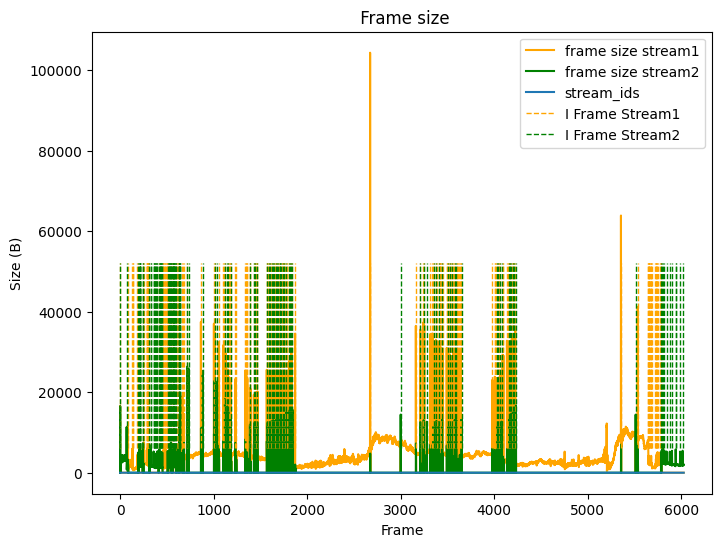

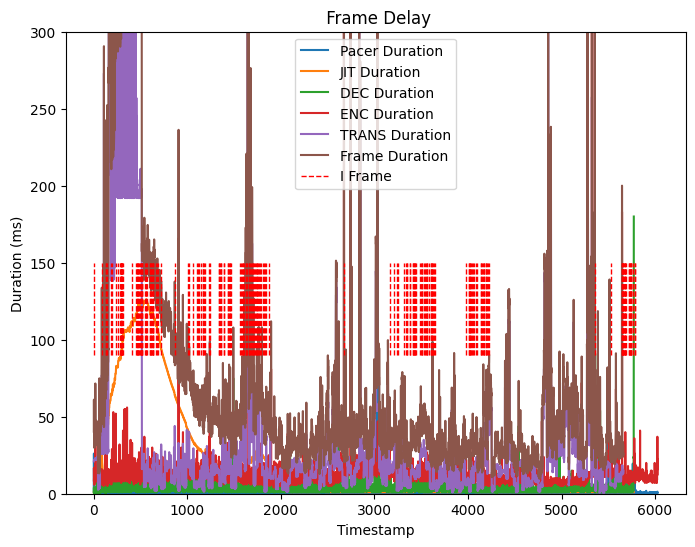

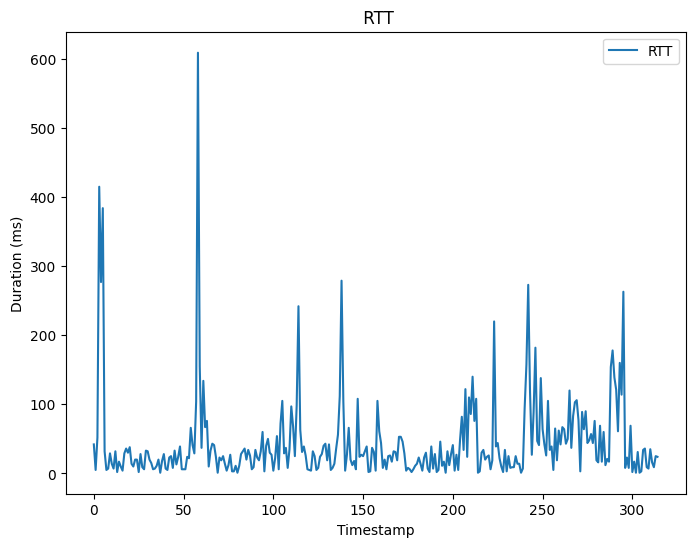

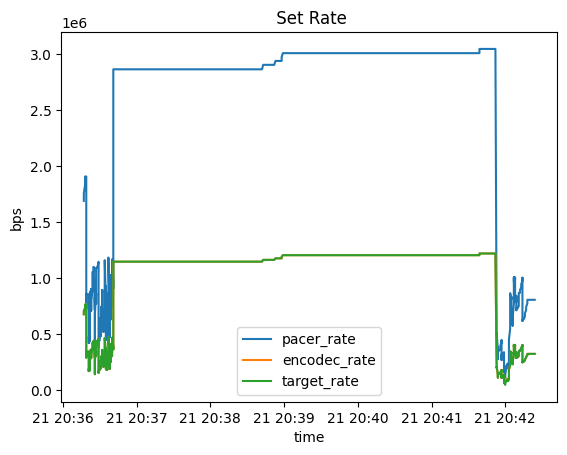

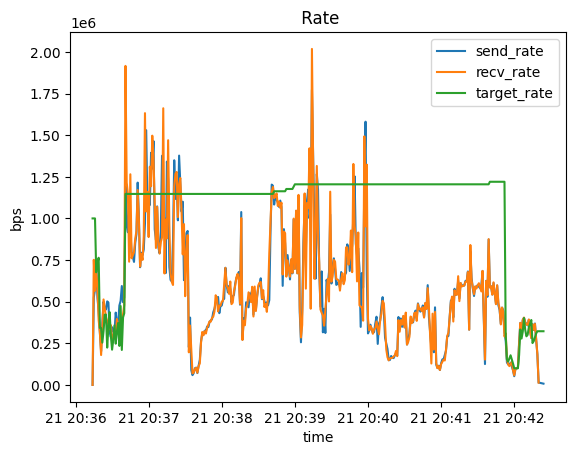

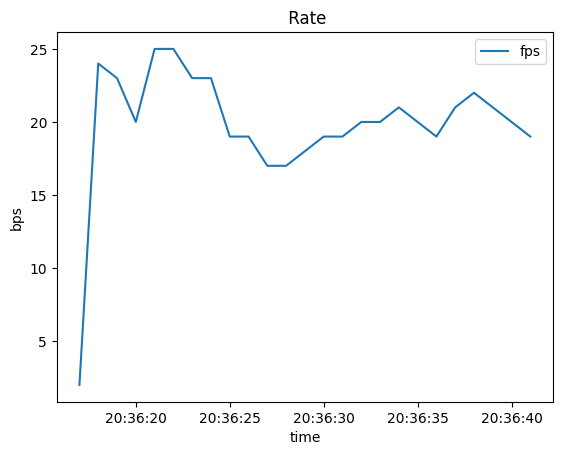

In [56]:
"""log 38:
pacer rate= target rate*2.5
self._drain_large_queues:bool=False # 排空
self.use_multistream =True
"""
import re
import datetime
import matplotlib.pyplot as plt
def get_pattern_data(recv_log_file,pattern):
    fps_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            fps_match = pattern.search(line)
            if fps_match:
                timestamp_str = fps_match.group('timestamp')
                data = fps_match.group('data')
                # print(frame_delay_str)
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                fps_values.append({
                    'timestamp': timestamp,
                    'data': float(data),
                })
    return fps_values
send_file="./offer/test-rtt38.log"
recv_file="./answer/test-rtt38.log"
# 提取数据
jit_dur_values=plot_jit_delay(recv_file)
dec_dur_values=plot_dec_delay(recv_file)
enc_dur_values=plot_enc_delay(send_file)
rtt_dur_values=plot_rtt(send_file)
recv_rate_values=plot_recv_rate(recv_file)
send_rate_values=plot_send_rate(send_file)
actual_encodec_values=encode_bitrate(send_file)
trans_dur_values=trans_packet_dur(recv_file)
pacer_values=get_fisrt_queue_time(send_file)
pacer_rate_values,remain_values=get_pacer_rate(send_file) #bps
# 提取时间戳和 jitter_delay估计值 wait_time frame_delay观测值
timestamps1 = [entry['timestamp'] for entry in jit_dur_values]
jit_durs = [entry['jitter_delay'] for entry in jit_dur_values]
wait_times = [entry['wait_time'] for entry in jit_dur_values]
frame_delays = [entry['frame_delay'] for entry in jit_dur_values]
# 提取时间戳和解码延迟
timestamps2 = [entry['timestamp'] for entry in dec_dur_values]
dec_durs = [entry['dec_dur'] for entry in dec_dur_values]
# 提取pacer_time第一个数据包的pacer延迟
timestamps3 = [entry['timestamp'] for entry in pacer_values]
pacer_times = [entry['pacer_time'] for entry in pacer_values]
# 提取设置的pacing rate target_bitrate encode_bitrate
timestamps4 = [entry['timestamp'] for entry in pacer_rate_values]
pacer_rates_set = [entry['pacingrate'] for entry in pacer_rate_values]
target_rate_set = [entry['target_bitrate'] for entry in pacer_rate_values]
encode_rate_set = [entry['encode_bitrate'] for entry in pacer_rate_values]

# 提取remain_bytes
timestamp5 = [entry['timestamp'] for entry in remain_values]
remain_bytes = [entry['remain_bytes'] for entry in remain_values]
# 提取时间戳，enc_dur streamid frametype framesize expectqueuetime
frame_numbers = [float(entry['timestamp'])for entry in enc_dur_values]
enc_durs = [entry['enc_dur'] for entry in enc_dur_values]
stream_ids = [entry['streamid'] for entry in enc_dur_values]
frame_types = [entry['frametype'] for entry in enc_dur_values]
frame_sizes = [float(entry['framesize']) for entry in enc_dur_values]
frame_types_stream1=[]
frame_sizes_stream1=[]
frame_types_stream2=[]
frame_sizes_stream2=[]
expect_queue_time = [entry['expectqueuetime'] for entry in enc_dur_values]

for i in range(len(stream_ids)):
    if stream_ids[i]==1:
        frame_types_stream1.append(frame_types[i])
        frame_sizes_stream1.append(frame_sizes[i])
        frame_types_stream2.append(0)
        frame_sizes_stream2.append(0)
    else:
        frame_types_stream2.append(frame_types[i])
        frame_sizes_stream2.append(frame_sizes[i])
        frame_types_stream1.append(0)
        frame_sizes_stream1.append(0)
# 提取 rtt
timestamps6 = [entry['timestamp'] for entry in rtt_dur_values]
rtt_durs=[enrty["rtt"] for enrty in rtt_dur_values]
# 提取 send_rate target_bitrate
timestamps7 = [entry['timestamp'] for entry in send_rate_values]
send_rate=[entry["send_rate"] for entry in send_rate_values]
target_bitrate=[entry["target_bitrate"] for entry in send_rate_values]

# 提取 recv_rate
timestamps8 = [entry['timestamp'] for entry in recv_rate_values]
recv_rate=[entry["recv_rate"] for entry in recv_rate_values]

# 提取 实际编码encodec_rate
timestamps10 = [entry['timestamp'] for entry in actual_encodec_values]
actual_encodec_rate=[entry["encodec_rate"] for entry in actual_encodec_values]
# 提取 trans_dur
timestamps11 = [entry['timestamp'] for entry in trans_dur_values]
trans_dur=[entry["value"] for entry in trans_dur_values]
trans_dur=calculatr_trans_dur(timestamps6,rtt_durs,timestamps11,trans_dur)

#提取I帧索引
i_frame_indices_stream1 = [i for i, frame_type in enumerate(frame_types_stream1) if frame_type == "SPS" or frame_type=="FRAME_I"]
i_frame_indices_stream2 = [i for i, frame_type in enumerate(frame_types_stream2) if frame_type == "SPS" or frame_type=="FRAME_I"]
# 提取应用层指标fps
fps_values=get_fps(recv_file)
timestamps12 = [entry['timestamp'] for entry in fps_values]
fps=[entry["fps"] for entry in fps_values]



plt.figure(figsize=(8, 6))
plt.plot(frame_sizes_stream1, color='orange',label='frame size stream1')
plt.plot(frame_sizes_stream2, color='green',label='frame size stream2')
plt.plot(stream_ids, label='stream_ids')
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='orange', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream1' if i_frame_index == i_frame_indices_stream1[0] else '')
for i_frame_index in i_frame_indices_stream2:
    plt.axvline(x=i_frame_index, color='green', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream2' if i_frame_index == i_frame_indices_stream2[0] else '')
plt.xlabel('Frame')
plt.ylabel('Size (B)')
plt.title(' Frame size')
# plt.ylim(0,100000)
# plt.xlim(400,500)
# plt.xlim(4000,5000)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(pacer_times,label="Pacer Duration")
plt.plot(jit_durs, label='JIT Duration')
plt.plot(dec_durs, label='DEC Duration')
plt.plot(enc_durs, label='ENC Duration')
plt.plot(trans_dur, label='TRANS Duration')
plt.plot([a + b + c +d +e for a, b, c, d,e in zip(trans_dur, jit_durs,enc_durs, dec_durs,pacer_times)], label='Frame Duration')
# 在I帧的位置画竖线
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='red', ymin=0.3, ymax=0.5,linestyle='--', linewidth=1,label='I Frame' if i_frame_index == i_frame_indices_stream1[0] else '')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
plt.ylim(0,300)
# plt.xlim(4000,5000)
plt.title(' Frame Delay')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(rtt_durs, label='RTT')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
# plt.ylim(0,100)
plt.title(' RTT')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps4,pacer_rates_set, label='pacer_rate') 
plt.plot(timestamps4,encode_rate_set, label='encodec_rate') 
plt.plot(timestamps4,target_rate_set, label='target_rate') #receiver REMB RTCP estimated maximum bitrate
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Set Rate')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps7,send_rate, label='send_rate')
plt.plot(timestamps8,recv_rate, label='recv_rate')
plt.plot(timestamps7,target_bitrate, label='target_rate')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


plt.figure()
plt.plot(timestamps12,fps, label='fps')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


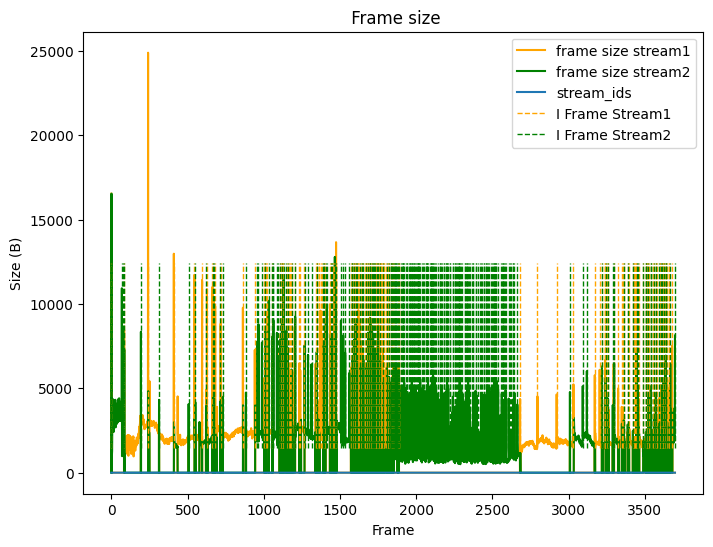

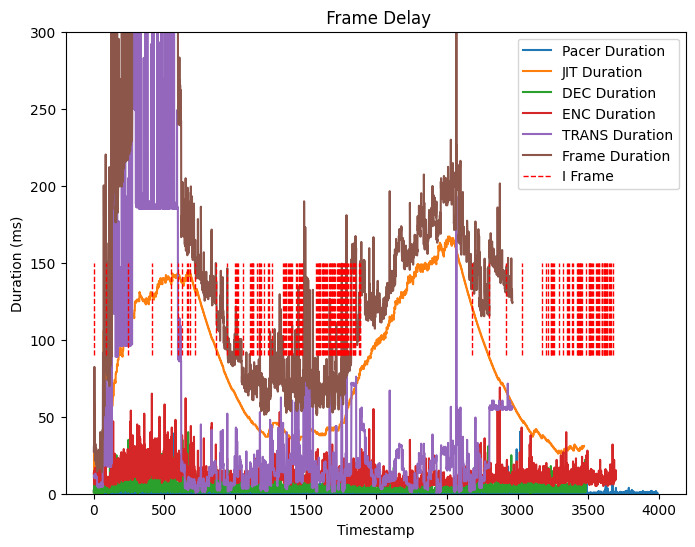

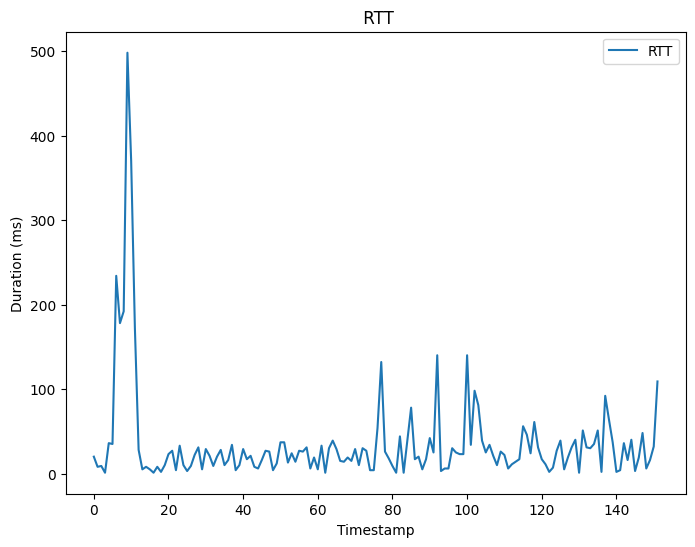

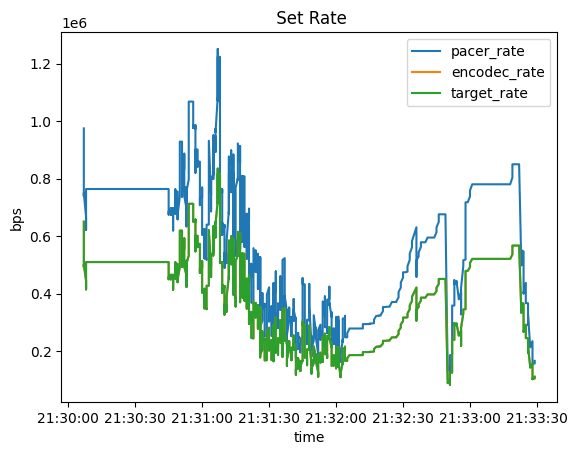

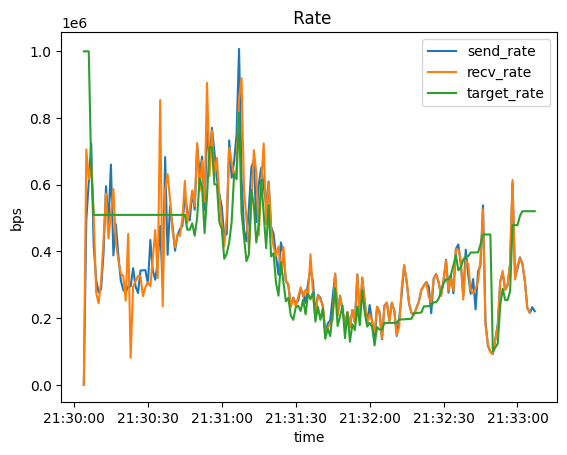

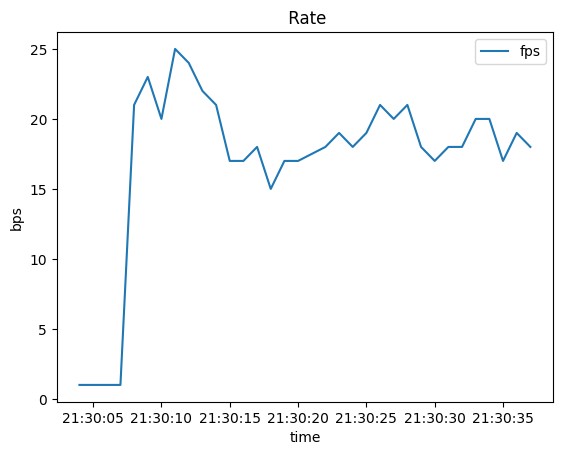

In [67]:
"""log 39:
pacer rate= target rate*1.5
self._drain_large_queues:bool=False # 排空
self.use_multistream =True
"""
import re
import datetime
import matplotlib.pyplot as plt
def get_pattern_data(recv_log_file,pattern):
    fps_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            fps_match = pattern.search(line)
            if fps_match:
                timestamp_str = fps_match.group('timestamp')
                data = fps_match.group('data')
                # print(frame_delay_str)
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                fps_values.append({
                    'timestamp': timestamp,
                    'data': float(data),
                })
    return fps_values
send_file="./offer/test-rtt39.log"
recv_file="./answer/test-rtt39.log"
# 提取数据
jit_dur_values=plot_jit_delay(recv_file)
dec_dur_values=plot_dec_delay(recv_file)
enc_dur_values=plot_enc_delay(send_file)
rtt_dur_values=plot_rtt(send_file)
recv_rate_values=plot_recv_rate(recv_file)
send_rate_values=plot_send_rate(send_file)
actual_encodec_values=encode_bitrate(send_file)
trans_dur_values=trans_packet_dur(recv_file)
pacer_values=get_fisrt_queue_time(send_file)
pacer_rate_values,remain_values=get_pacer_rate(send_file) #bps
# 提取时间戳和 jitter_delay估计值 wait_time frame_delay观测值
timestamps1 = [entry['timestamp'] for entry in jit_dur_values]
jit_durs = [entry['jitter_delay'] for entry in jit_dur_values]
wait_times = [entry['wait_time'] for entry in jit_dur_values]
frame_delays = [entry['frame_delay'] for entry in jit_dur_values]
# 提取时间戳和解码延迟
timestamps2 = [entry['timestamp'] for entry in dec_dur_values]
dec_durs = [entry['dec_dur'] for entry in dec_dur_values]
# 提取pacer_time第一个数据包的pacer延迟
timestamps3 = [entry['timestamp'] for entry in pacer_values]
pacer_times = [entry['pacer_time'] for entry in pacer_values]
# 提取设置的pacing rate target_bitrate encode_bitrate
timestamps4 = [entry['timestamp'] for entry in pacer_rate_values]
pacer_rates_set = [entry['pacingrate'] for entry in pacer_rate_values]
target_rate_set = [entry['target_bitrate'] for entry in pacer_rate_values]
encode_rate_set = [entry['encode_bitrate'] for entry in pacer_rate_values]

# 提取remain_bytes
timestamp5 = [entry['timestamp'] for entry in remain_values]
remain_bytes = [entry['remain_bytes'] for entry in remain_values]
# 提取时间戳，enc_dur streamid frametype framesize expectqueuetime
frame_numbers = [float(entry['timestamp'])for entry in enc_dur_values]
enc_durs = [entry['enc_dur'] for entry in enc_dur_values]
stream_ids = [entry['streamid'] for entry in enc_dur_values]
frame_types = [entry['frametype'] for entry in enc_dur_values]
frame_sizes = [float(entry['framesize']) for entry in enc_dur_values]
frame_types_stream1=[]
frame_sizes_stream1=[]
frame_types_stream2=[]
frame_sizes_stream2=[]
expect_queue_time = [entry['expectqueuetime'] for entry in enc_dur_values]

for i in range(len(stream_ids)):
    if stream_ids[i]==1:
        frame_types_stream1.append(frame_types[i])
        frame_sizes_stream1.append(frame_sizes[i])
        frame_types_stream2.append(0)
        frame_sizes_stream2.append(0)
    else:
        frame_types_stream2.append(frame_types[i])
        frame_sizes_stream2.append(frame_sizes[i])
        frame_types_stream1.append(0)
        frame_sizes_stream1.append(0)
# 提取 rtt
timestamps6 = [entry['timestamp'] for entry in rtt_dur_values]
rtt_durs=[enrty["rtt"] for enrty in rtt_dur_values]
# 提取 send_rate target_bitrate
timestamps7 = [entry['timestamp'] for entry in send_rate_values]
send_rate=[entry["send_rate"] for entry in send_rate_values]
target_bitrate=[entry["target_bitrate"] for entry in send_rate_values]

# 提取 recv_rate
timestamps8 = [entry['timestamp'] for entry in recv_rate_values]
recv_rate=[entry["recv_rate"] for entry in recv_rate_values]

# 提取 实际编码encodec_rate
timestamps10 = [entry['timestamp'] for entry in actual_encodec_values]
actual_encodec_rate=[entry["encodec_rate"] for entry in actual_encodec_values]
# 提取 trans_dur
timestamps11 = [entry['timestamp'] for entry in trans_dur_values]
trans_dur=[entry["value"] for entry in trans_dur_values]
trans_dur=calculatr_trans_dur(timestamps6,rtt_durs,timestamps11,trans_dur)

#提取I帧索引
i_frame_indices_stream1 = [i for i, frame_type in enumerate(frame_types_stream1) if frame_type == "SPS" or frame_type=="FRAME_I"]
i_frame_indices_stream2 = [i for i, frame_type in enumerate(frame_types_stream2) if frame_type == "SPS" or frame_type=="FRAME_I"]
# 提取应用层指标fps
fps_values=get_fps(recv_file)
timestamps12 = [entry['timestamp'] for entry in fps_values]
fps=[entry["fps"] for entry in fps_values]



plt.figure(figsize=(8, 6))
plt.plot(frame_sizes_stream1, color='orange',label='frame size stream1')
plt.plot(frame_sizes_stream2, color='green',label='frame size stream2')
plt.plot(stream_ids, label='stream_ids')
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='orange', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream1' if i_frame_index == i_frame_indices_stream1[0] else '')
for i_frame_index in i_frame_indices_stream2:
    plt.axvline(x=i_frame_index, color='green', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream2' if i_frame_index == i_frame_indices_stream2[0] else '')
plt.xlabel('Frame')
plt.ylabel('Size (B)')
plt.title(' Frame size')
# plt.ylim(0,100000)
# plt.xlim(400,500)
# plt.xlim(4000,5000)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(pacer_times,label="Pacer Duration")
plt.plot(jit_durs, label='JIT Duration')
plt.plot(dec_durs, label='DEC Duration')
plt.plot(enc_durs, label='ENC Duration')
plt.plot(trans_dur, label='TRANS Duration')
plt.plot([a + b + c +d +e for a, b, c, d,e in zip(trans_dur, jit_durs,enc_durs, dec_durs,pacer_times)], label='Frame Duration')
# 在I帧的位置画竖线
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='red', ymin=0.3, ymax=0.5,linestyle='--', linewidth=1,label='I Frame' if i_frame_index == i_frame_indices_stream1[0] else '')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
plt.ylim(0,300)
# plt.xlim(4000,5000)
plt.title(' Frame Delay')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(rtt_durs, label='RTT')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
# plt.ylim(0,100)
plt.title(' RTT')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps4,pacer_rates_set, label='pacer_rate') 
plt.plot(timestamps4,encode_rate_set, label='encodec_rate') 
plt.plot(timestamps4,target_rate_set, label='target_rate') #receiver REMB RTCP estimated maximum bitrate
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Set Rate')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps7,send_rate, label='send_rate')
plt.plot(timestamps8,recv_rate, label='recv_rate')
plt.plot(timestamps7,target_bitrate, label='target_rate')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


plt.figure()
plt.plot(timestamps12,fps, label='fps')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


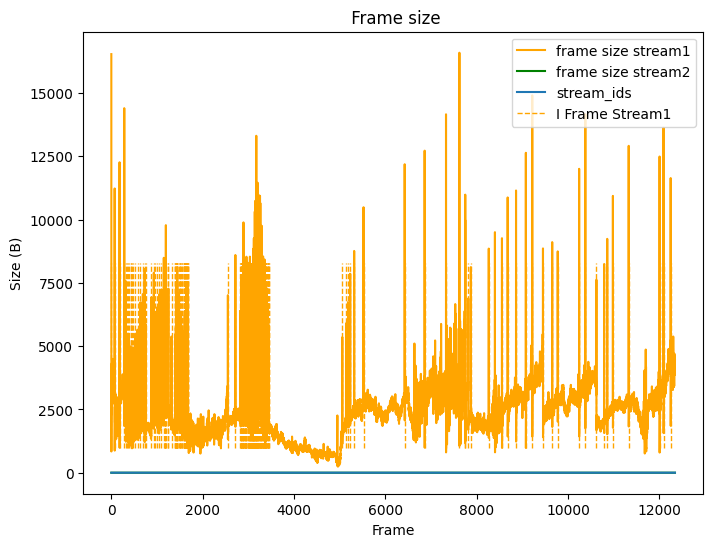

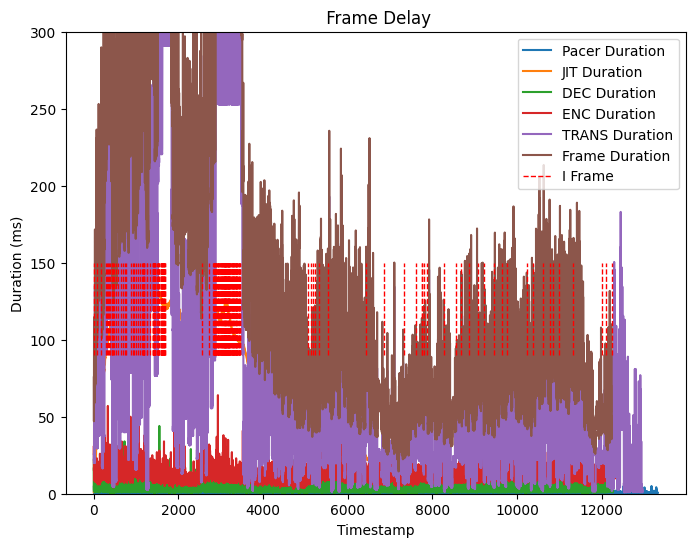

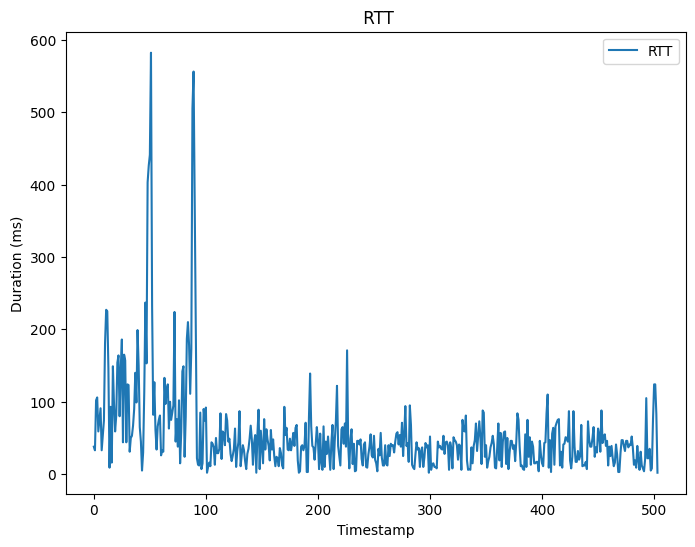

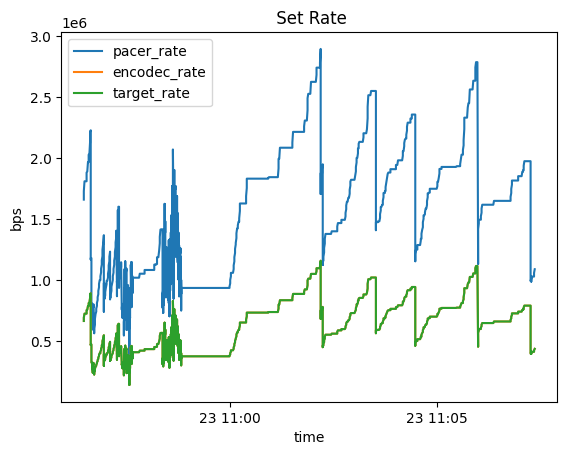

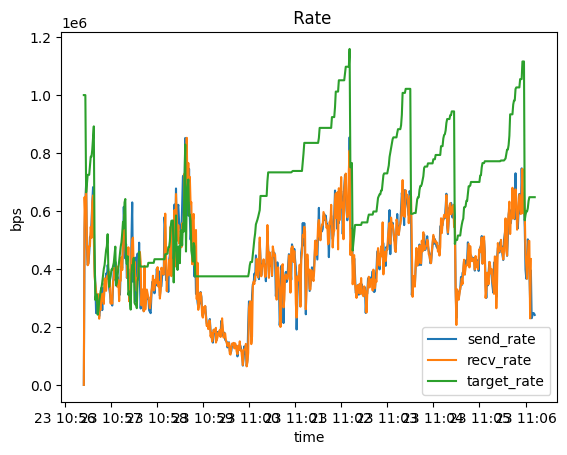

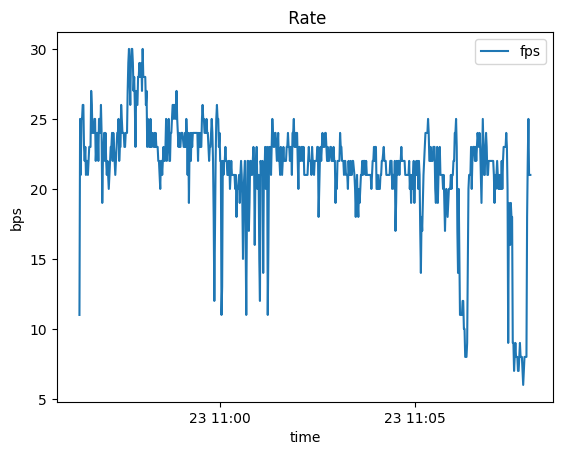

In [75]:
"""log 41:
pacer rate= target rate*2.5
self._drain_large_queues:bool=False # 排空
self.use_multistream =False

"""
import re
import datetime
import matplotlib.pyplot as plt
def get_pattern_data(recv_log_file,pattern):
    fps_values=[]
    with open(recv_log_file, 'r') as file:
        for line in file:
            line = line.strip()
            fps_match = pattern.search(line)
            if fps_match:
                timestamp_str = fps_match.group('timestamp')
                data = fps_match.group('data')
                # print(frame_delay_str)
                # 解析时间戳字符串为 datetime 对象
                timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                # 将时间戳和 jit_dur 添加到列表
                fps_values.append({
                    'timestamp': timestamp,
                    'data': float(data),
                })
    return fps_values
send_file="./offer/test-rtt42.log"
recv_file="./answer/test-rtt42.log"
# 提取数据
jit_dur_values=plot_jit_delay(recv_file)
dec_dur_values=plot_dec_delay(recv_file)
enc_dur_values=plot_enc_delay(send_file)
rtt_dur_values=plot_rtt(send_file)
recv_rate_values=plot_recv_rate(recv_file)
send_rate_values=plot_send_rate(send_file)
actual_encodec_values=encode_bitrate(send_file)
trans_dur_values=trans_packet_dur(recv_file)
pacer_values=get_fisrt_queue_time(send_file)
pacer_rate_values,remain_values=get_pacer_rate(send_file) #bps
# 提取时间戳和 jitter_delay估计值 wait_time frame_delay观测值
timestamps1 = [entry['timestamp'] for entry in jit_dur_values]
jit_durs = [entry['jitter_delay'] for entry in jit_dur_values]
wait_times = [entry['wait_time'] for entry in jit_dur_values]
frame_delays = [entry['frame_delay'] for entry in jit_dur_values]
# 提取时间戳和解码延迟
timestamps2 = [entry['timestamp'] for entry in dec_dur_values]
dec_durs = [entry['dec_dur'] for entry in dec_dur_values]
# 提取pacer_time第一个数据包的pacer延迟
timestamps3 = [entry['timestamp'] for entry in pacer_values]
pacer_times = [entry['pacer_time'] for entry in pacer_values]
# 提取设置的pacing rate target_bitrate encode_bitrate
timestamps4 = [entry['timestamp'] for entry in pacer_rate_values]
pacer_rates_set = [entry['pacingrate'] for entry in pacer_rate_values]
target_rate_set = [entry['target_bitrate'] for entry in pacer_rate_values]
encode_rate_set = [entry['encode_bitrate'] for entry in pacer_rate_values]

# 提取remain_bytes
timestamp5 = [entry['timestamp'] for entry in remain_values]
remain_bytes = [entry['remain_bytes'] for entry in remain_values]
# 提取时间戳，enc_dur streamid frametype framesize expectqueuetime
frame_numbers = [float(entry['timestamp'])for entry in enc_dur_values]
enc_durs = [entry['enc_dur'] for entry in enc_dur_values]
stream_ids = [entry['streamid'] for entry in enc_dur_values]
frame_types = [entry['frametype'] for entry in enc_dur_values]
frame_sizes = [float(entry['framesize']) for entry in enc_dur_values]
frame_types_stream1=[]
frame_sizes_stream1=[]
frame_types_stream2=[]
frame_sizes_stream2=[]
expect_queue_time = [entry['expectqueuetime'] for entry in enc_dur_values]

for i in range(len(stream_ids)):
    if stream_ids[i]==1:
        frame_types_stream1.append(frame_types[i])
        frame_sizes_stream1.append(frame_sizes[i])
        frame_types_stream2.append(0)
        frame_sizes_stream2.append(0)
    else:
        frame_types_stream2.append(frame_types[i])
        frame_sizes_stream2.append(frame_sizes[i])
        frame_types_stream1.append(0)
        frame_sizes_stream1.append(0)
# 提取 rtt
timestamps6 = [entry['timestamp'] for entry in rtt_dur_values]
rtt_durs=[enrty["rtt"] for enrty in rtt_dur_values]
# 提取 send_rate target_bitrate
timestamps7 = [entry['timestamp'] for entry in send_rate_values]
send_rate=[entry["send_rate"] for entry in send_rate_values]
target_bitrate=[entry["target_bitrate"] for entry in send_rate_values]

# 提取 recv_rate
timestamps8 = [entry['timestamp'] for entry in recv_rate_values]
recv_rate=[entry["recv_rate"] for entry in recv_rate_values]

# 提取 实际编码encodec_rate
timestamps10 = [entry['timestamp'] for entry in actual_encodec_values]
actual_encodec_rate=[entry["encodec_rate"] for entry in actual_encodec_values]
# 提取 trans_dur
timestamps11 = [entry['timestamp'] for entry in trans_dur_values]
trans_dur=[entry["value"] for entry in trans_dur_values]
trans_dur=calculatr_trans_dur(timestamps6,rtt_durs,timestamps11,trans_dur)

#提取I帧索引
i_frame_indices_stream1 = [i for i, frame_type in enumerate(frame_types_stream1) if frame_type == "SPS" or frame_type=="FRAME_I"]
i_frame_indices_stream2 = [i for i, frame_type in enumerate(frame_types_stream2) if frame_type == "SPS" or frame_type=="FRAME_I"]

# 提取应用层指标fps
fps_values=get_fps(recv_file)
timestamps12 = [entry['timestamp'] for entry in fps_values]
fps=[entry["fps"] for entry in fps_values]



plt.figure(figsize=(8, 6))
plt.plot(frame_sizes_stream1, color='orange',label='frame size stream1')
plt.plot(frame_sizes_stream2, color='green',label='frame size stream2')
plt.plot(stream_ids, label='stream_ids')
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='orange', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream1' if i_frame_index == i_frame_indices_stream1[0] else '')
for i_frame_index in i_frame_indices_stream2:
    plt.axvline(x=i_frame_index, color='green', ymin=0.1, ymax=0.5,linestyle='--', linewidth=1,label='I Frame Stream2' if i_frame_index == i_frame_indices_stream2[0] else '')
plt.xlabel('Frame')
plt.ylabel('Size (B)')
plt.title(' Frame size')
# plt.ylim(0,100000)
# plt.xlim(400,500)
# plt.xlim(4000,5000)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(pacer_times,label="Pacer Duration")
plt.plot(jit_durs, label='JIT Duration')
plt.plot(dec_durs, label='DEC Duration')
plt.plot(enc_durs, label='ENC Duration')
plt.plot(trans_dur, label='TRANS Duration')
plt.plot([a + b + c +d +e for a, b, c, d,e in zip(trans_dur, jit_durs,enc_durs, dec_durs,pacer_times)], label='Frame Duration')
# 在I帧的位置画竖线
for i_frame_index in i_frame_indices_stream1:
    plt.axvline(x=i_frame_index, color='red', ymin=0.3, ymax=0.5,linestyle='--', linewidth=1,label='I Frame' if i_frame_index == i_frame_indices_stream1[0] else '')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
plt.ylim(0,300)
# plt.xlim(4000,5000)
plt.title(' Frame Delay')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(rtt_durs, label='RTT')
plt.xlabel('Timestamp')
plt.ylabel('Duration (ms)')
# plt.ylim(0,100)
plt.title(' RTT')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps4,pacer_rates_set, label='pacer_rate') 
plt.plot(timestamps4,encode_rate_set, label='encodec_rate') 
plt.plot(timestamps4,target_rate_set, label='target_rate') #receiver REMB RTCP estimated maximum bitrate
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Set Rate')
plt.legend()
plt.show()

plt.figure()
plt.plot(timestamps7,send_rate, label='send_rate')
plt.plot(timestamps8,recv_rate, label='recv_rate')
plt.plot(timestamps7,target_bitrate, label='target_rate')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


plt.figure()
plt.plot(timestamps12,fps, label='fps')
plt.xlabel('time')
plt.ylabel('bps')
# plt.ylim(0,2000000)
# plt.xlim(00,1000)
plt.title(' Rate')
plt.legend()
plt.show()


In [49]:
with open("./keyframe/log41.txt", 'w') as file:
    for item in i_frame_indices_stream1:
        file.write(str(item) + '\n')